In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

In [3]:
directorio = 'datos_histogramas/'
nombrearchivo='data101.csv'
data = pd.read_csv(directorio + nombrearchivo,header=None,names={'data'})

In [4]:
data[0:10] #Mostrar primeros datos

,data
0,109.228
1,80.240
2,144.112
3,94.652
4,91.064
5,103.702
6,91.446
7,114.561
8,80.592
9,126.548


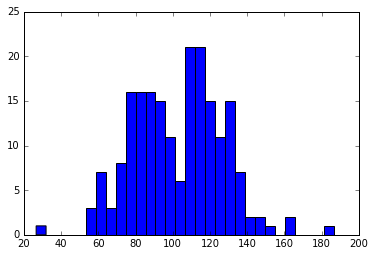

In [5]:
count, bin_edges, ignored = plt.hist(data['data'], 30, normed=False)
#muestro el grafico
plt.show()

Numero de bins = 14


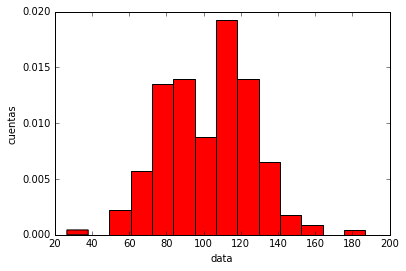

In [6]:
#nbins = 30
#nbins = int(1 + np.log2(len(data))) # Sturges
nbins = int(np.sqrt(len(data))) # Sqrt
print("Numero de bins = " + str(nbins))

#grafico el histograma y de paso calculo los valores
colors = ['red'] # [1,0,0]
#count, bin_centers, ignored = plt.hist(result['data'], nbins, normed=True,color=colors)
count, bin_edges, ignored = plt.hist(data['data'], nbins, normed=True,color=colors)

#le pongo nombres a los ejes
plt.xlabel('data')
plt.ylabel('cuentas')

#muestro el grafico
plt.show()

In [7]:
nombrearchivo='data102.csv'
data2 = pd.read_csv(directorio + nombrearchivo,header=None,names={'data2'})
result = pd.concat([data, data2], axis=1)

result[0:10]

,data,data2
0,109.228,75.525
1,80.240,52.541
2,144.112,48.527
3,94.652,66.637
4,91.064,55.225
5,103.702,37.624
6,91.446,49.322
7,114.561,42.818
8,80.592,18.375
9,126.548,58.399


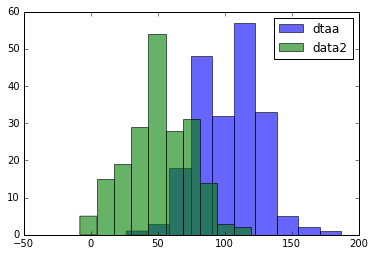

In [8]:
plt.hist(result["data"], alpha=0.6, label="dtaa")
plt.hist(result["data2"], alpha=0.6, label="data2")
plt.legend()
plt.show()

In [10]:
media = np.mean(data['data'])
desvio = np.std(data['data'],ddof=1)
N = len(data['data'])
sem = desvio / np.sqrt(N)

In [11]:
np.sqrt(sum(np.power(data['data']-media,2))/(N-1))

23.842778173053198

In [12]:
desvio # Para imprimir los valores, puedo sólo escribirlos al final de la celda

23.842778173053198

In [18]:
print('Media = ' + str(media)) # ... puedo convertirlos a texto (str()) y unirlos a otro texto (con +)
print('Desvio estandar = %s'%str(desvio)) # ... puedo convertirlos a texto (str()) y llamarlos como variable (%s), lo bueno es que puedo llamar muchas variables.
print('Error estandar de la media = %f'%sem) # ... puedo llamarlo como variable numérica (%f)
print('Error estandar de la media = %0.3f'%sem) # ... puedo llamarlo como variable numérica (%f) controlando el número de decimales que muestra


Media = 102.457575
Desvio estandar = 23.8427781731
Error estandar de la media = 1.685939
Error estandar de la media = 1.686


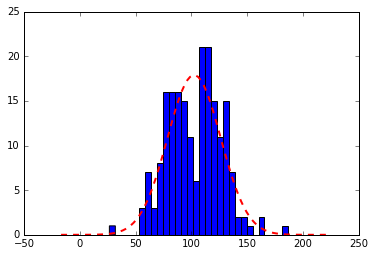

In [19]:
# Grafico Gaussiana sobre el histograma usando los valores antes calculados
nbins = 30

#grafico el histograma y de paso calculo los valores
count, bin_centers, ignored = plt.hist(data['data'], nbins, normed=False)

bin_size=bin_centers[1]-bin_centers[0] # calculo el ancho de los bins del histograma

x_gaussiana=np.linspace(media-5*desvio, media+5*desvio, num=100) # armo una lista de puntos donde quiero graficar la distribución de ajuste

gaussiana=mlab.normpdf(x_gaussiana, media, desvio)*N*bin_size # calculo la gaussiana que corresponde al histograma

plt.plot(x_gaussiana,gaussiana,'r--', linewidth=2, label='ajuste 1') #grafico la gaussiana

plt.show()